In [1]:
import sys
sys.path.append('/glade/u/home/fillmore/MELODIES-MONET/')
sys.path.append('/glade/u/home/fillmore/MELODIES-MONET/melodies_monet/')

from melodies_monet import driver

/glade/u/home/cdswk/python/miniconda3/lib/python3.7/site-packages/dask/dataframe/utils.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Please install s3fs if retrieving from the Amazon S3 Servers.  Otherwise continue with local data
Please install h5py to open files from the Amazon S3 servers.
Please install h5netcdf to open files from the Amazon S3 servers.


In [2]:
an = driver.analysis()
an.control = 'mm_basics.yaml'
an.read_control()
an.control_dict

{'analysis': {'start_time': '2019-09-05-06:00:00',
  'end_time': '2019-09-06-06:00:00',
  'output_dir': '/glade/u/home/fillmore/MELODIES/plots',
  'debug': True},
 'model': {'RACM_ESRL': {'files': '/glade/p/acom/MUSICA/melodies_tutorial/example_model_data/wrfchem_example/racm_esrl/wrfout_d01_2019*',
   'mod_type': 'wrfchem',
   'mod_kwargs': {'mech': 'racm_esrl_vcp'},
   'radius_of_influence': 12000,
   'mapping': {'AirNow': {'o3': 'OZONE'}},
   'projection': 'None',
   'plot_kwargs': {'color': 'magenta', 'marker': 's', 'linestyle': '-'}}},
 'obs': {'AirNow': {'use_airnow': True,
   'filename': '/glade/p/acom/MUSICA/melodies_tutorial/example_observation_data/surface/AIRNOW_20190901_20190930.nc',
   'obs_type': 'pt_sfc',
   'variables': {'OZONE': {'unit_scale': 1,
     'unit_scale_method': '*',
     'nan_value': -1.0,
     'ylabel_plot': 'Ozone (ppbv)',
     'vmin_plot': 15.0,
     'vmax_plot': 55.0,
     'vdiff_plot': 20.0,
     'nlevels_plot': 21}}}},
 'plots': {'plot_timeseries_group

In [3]:
an.open_models()
an.models

RACM_ESRL
{'files': '/glade/p/acom/MUSICA/melodies_tutorial/example_model_data/wrfchem_example/racm_esrl/wrfout_d01_2019*', 'mod_type': 'wrfchem', 'mod_kwargs': {'mech': 'racm_esrl_vcp'}, 'radius_of_influence': 12000, 'mapping': {'AirNow': {'o3': 'OZONE'}}, 'projection': 'None', 'plot_kwargs': {'color': 'magenta', 'marker': 's', 'linestyle': '-'}}
/glade/p/acom/MUSICA/melodies_tutorial/example_model_data/wrfchem_example/racm_esrl/wrfout_d01_2019*
**** Reading WRF-Chem model output...


{'RACM_ESRL': model(
     model='wrfchem',
     radius_of_influence=12000,
     mod_kwargs={'mech': 'racm_esrl_vcp', 'var_list': ['o3', 'pres', 'height', 'tk', 'height_agl', 'PSFC']},
     file_str='/glade/p/acom/MUSICA/melodies_tutorial/example_model_data/wrfchem_example/racm_esrl/wrfout_d01_2019*',
     label='RACM_ESRL',
     obj=...,
     mapping={'AirNow': {'o3': 'OZONE'}},
     label='RACM_ESRL',
     ...
 )}

In [4]:
an.models['RACM_ESRL'].obj

<xarray.Dataset>
Dimensions:        (y: 284, x: 440, time: 31, z: 50)
Coordinates:
    longitude      (y, x) float32 -122.3 -122.2 -122.1 ... -60.68 -60.52 -60.37
    latitude       (y, x) float32 21.19 21.22 21.24 21.27 ... 50.28 50.24 50.2
  * time           (time) datetime64[ns] 2019-09-05 ... 2019-09-06T06:00:00
Dimensions without coordinates: y, x, z
Data variables:
    o3             (time, z, y, x) float32 30.0 30.0 ... 3.149e+03 3.149e+03
    pres_pa_mid    (time, z, y, x) float32 1.007e+05 1.007e+05 ... 5.584e+03
    alt_msl_m_mid  (time, z, y, x) float32 11.4 11.39 ... 2.016e+04 2.016e+04
    temperature_k  (time, z, y, x) float32 297.0 296.9 296.8 ... 220.5 220.4
    alt_agl_m_mid  (time, z, y, x) float32 11.41 11.4 ... 2.015e+04 2.016e+04
    surfpres_pa    (time, y, x) float32 1.008e+05 1.008e+05 ... 1.007e+05
Attributes: (12/15)
    FieldType:                 104
    MemoryOrder:               XYZ
    description:               O3 mixing ratio
    units:                     ppmv
    stagger:                   
    coordinates:               XLONG XLAT XTIME
    ...                        ...
    MOAD_CEN_LAT:              39.617638
    STAND_LON:                 -97.0
    MAP_PROJ:                  1
    CEN_LAT:                   39.617638
    CEN_LON:                   -97.77487
    mapping_tables_to_airnow:  {'OZONE': 'o3', 'PM2.5': 'PM2_5_DRY', 'PM10': ...

In [5]:
print(an.models['RACM_ESRL'].label)
print(an.models['RACM_ESRL'].mapping)
print(an.start_time)
print(an.end_time)

RACM_ESRL
{'AirNow': {'o3': 'OZONE'}}
2019-09-05 06:00:00
2019-09-06 06:00:00


In [6]:
an.open_obs()
an.obs['AirNow'].obj

<xarray.Dataset>
Dimensions:     (x: 3786, time: 2091, y: 1)
Coordinates:
  * x           (x) int64 0 1 2 3 4 5 6 7 ... 3779 3780 3781 3782 3783 3784 3785
  * time        (time) datetime64[ns] 2019-09-01 ... 2019-09-30T00:30:00
    latitude    (y, x) float64 ...
    longitude   (y, x) float64 ...
    siteid      (y, x) object ...
Dimensions without coordinates: y
Data variables: (12/30)
    BARPR       (time, y, x) float64 ...
    BC          (time, y, x) float64 ...
    CO          (time, y, x) float64 ...
    NO          (time, y, x) float64 ...
    NO2         (time, y, x) float64 ...
    NO2Y        (time, y, x) float64 ...
    ...          ...
    cmsa_name   (y, x) float64 ...
    msa_code    (y, x) float64 ...
    msa_name    (y, x) object ...
    state_name  (y, x) object ...
    epa_region  (y, x) object ...
    time_local  (time, y, x) datetime64[ns] ...
Attributes:
    title:         
    format:        NetCDF-4
    date_created:  2021-06-07

In [7]:
an.pair_data()

[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.4s


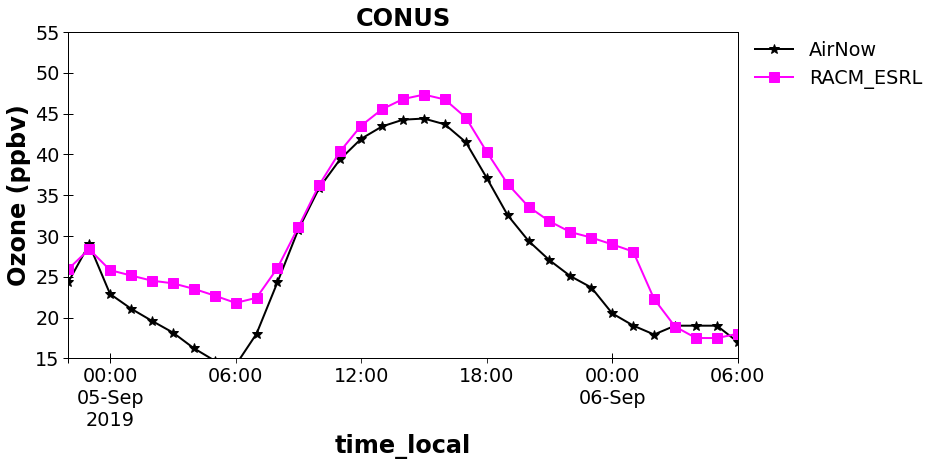

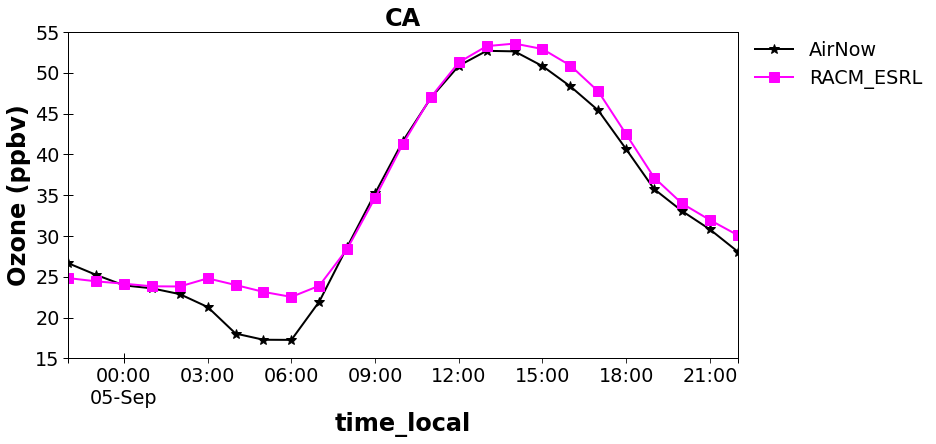

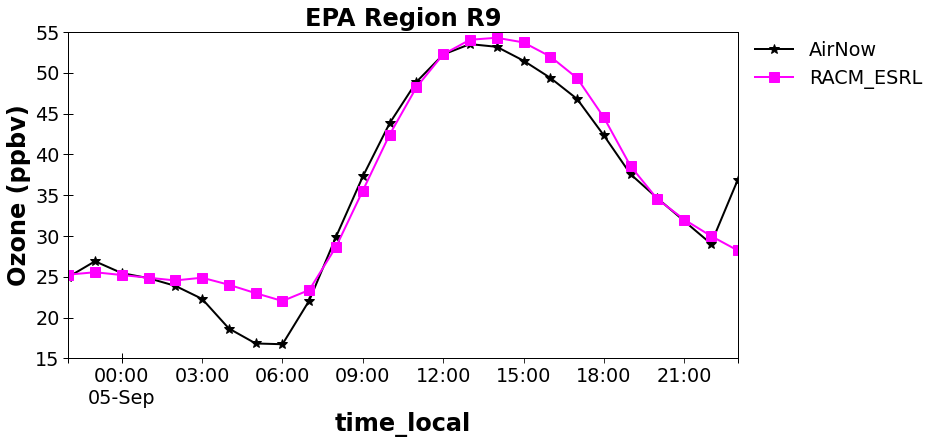

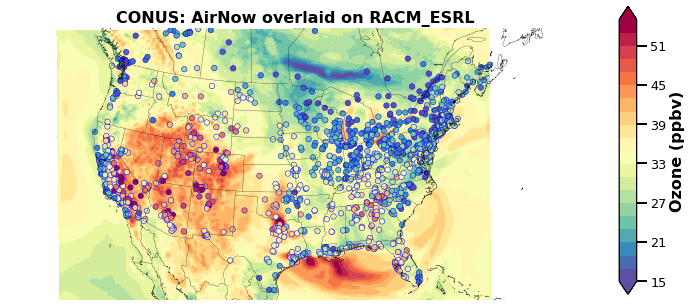

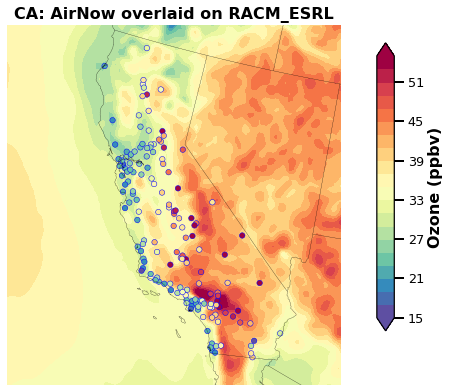

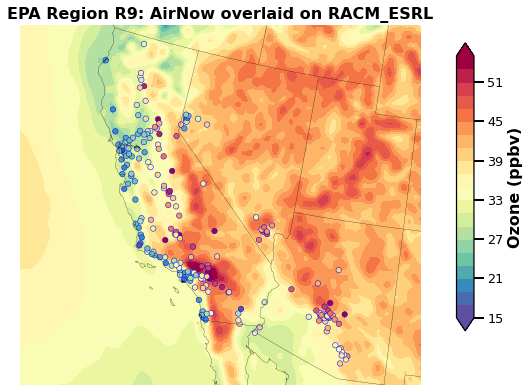

In [8]:
an.plotting()